In [108]:
import numpy as np # We use numpy here to get the data
import pandas as pd
import matplotlib.pyplot as plt # For visualizing plots
import seaborn as sns 
from scipy import stats
sns.set()

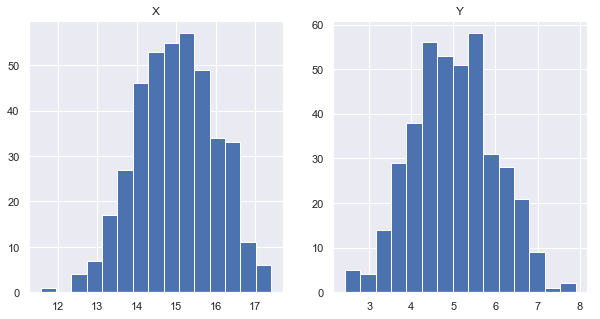

In [33]:
r = -0.6 # To give a straight increasing slope
mean = [15,5]
cov = [[1,r],[r,1]]
x,y = x,y = np.random.multivariate_normal(mean,cov,400).T
 
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x = x,bins = 15)
plt.title("X")

plt.subplot(1,2,2)
plt.hist(x = y , bins = 15)
plt.title("Y")

plt.show()

In [194]:
# Average age of a person to get widowed , in case of male and female
print(np.mean(dataset[(dataset.DMDMARTLx == 'Widowed') & (dataset.RIAGENDRx == 'Female')]['RIDAGEYR']))
print(np.mean(dataset[(dataset.DMDMARTLx == 'Widowed') & (dataset.RIAGENDRx == 'Male')]['RIDAGEYR']))
print(np.mean(dataset[(dataset.DMDMARTLx == 'Widowed')]['RIDAGEYR']))


71.53716216216216
71.4
71.50252525252525


In [197]:
# Average age of male and female in this data
print(np.mean(dataset[dataset['RIAGENDRx'] == 'Male']['RIDAGEYR']))
print(np.mean(dataset[dataset['RIAGENDRx'] == 'Female']['RIDAGEYR']))

48.332004349401956
47.793010752688176


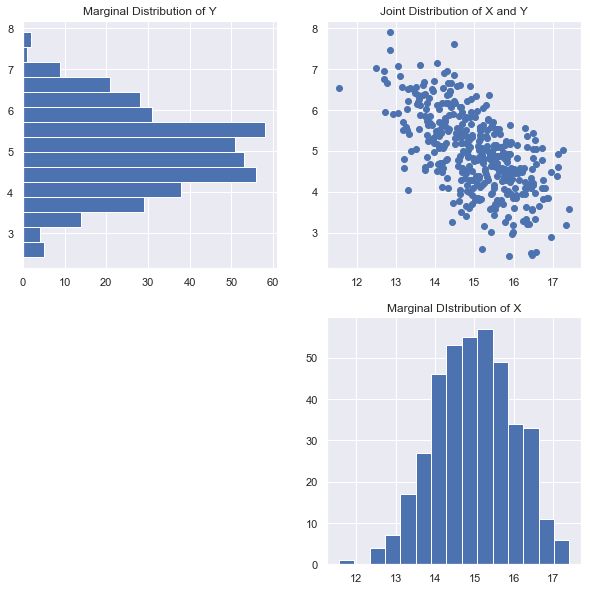

In [34]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,2)
plt.scatter(x = x , y = y)
plt.title("Joint Distribution of X and Y")

plt.subplot(2,2,1)
plt.hist(x = y , orientation = 'horizontal' , bins = 15)
plt.title('Marginal Distribution of Y')

plt.subplot(2,2,4)
plt.hist(x = x , bins = 15)
plt.title('Marginal DIstribution of X')

plt.show()


In [39]:
#Import dataset
pd.set_option('display.max_columns',100)
dataset = pd.read_csv('NHANES.csv')

dataset.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


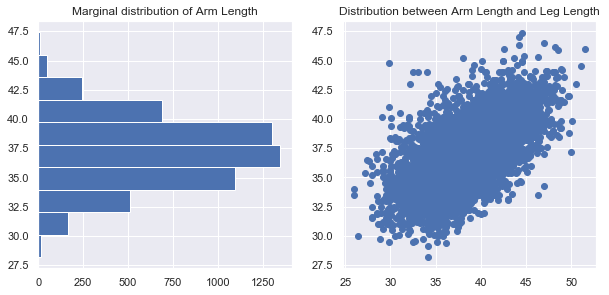

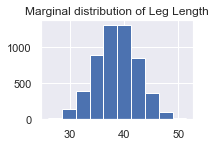

In [94]:
#Bivariate data analysis uses two components(quantitative) to find the realtionship , scatterplot is a common way to do this 
# So we will plot BMXARML and BMXLEGL 

plt.figure(figsize=(10,10))

plt.subplot(2,2,2)
plt.scatter(y = dataset.BMXARML , x = dataset.BMXLEG )
plt.title("Distribution between Arm Length and Leg Length")

plt.subplot(2,2,1)
plt.hist(dataset.BMXARML.dropna(),orientation = 'horizontal')
plt.title("Marginal distribution of Arm Length")
plt.show()

plt.subplot(2,2,3)
plt.hist(dataset.BMXLEG.dropna())
plt.title("Marginal distribution of Leg Length")
plt.show()

# Scatter Plot

Scatter plot is a easy and powerful technique to plot quantative bivartite data . Below we make scatterplot between arm length
and leg length means arm length is plot on y axis and leg length on x axis . Here we observe that arm length and leg length both have a linear relationship and people with long arm tend to have longer legs . Plots having more than 100 points tend to have overpopulating , that means many points are placed on each other , so we need to tune a parameter alpha


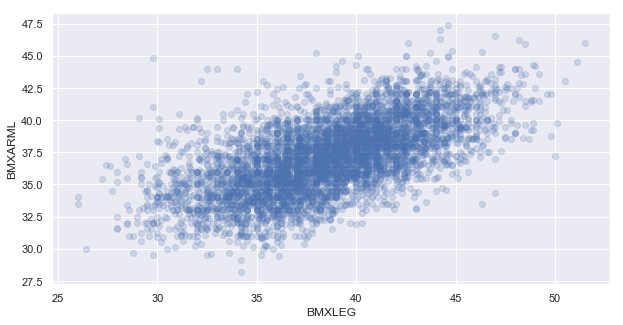

In [105]:
plt.figure(figsize=(10,5))
sns.regplot(x = dataset.BMXLEG , y = dataset.BMXARML,fit_reg= False , scatter_kws = {'alpha' : 0.2})
plt.show()

# Density Plot

One other way to do it by plotting density plot . In the plot below darker points shows where a greater number of points fall . The two plot shows there distribution and plot in middle shows there density jointly

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


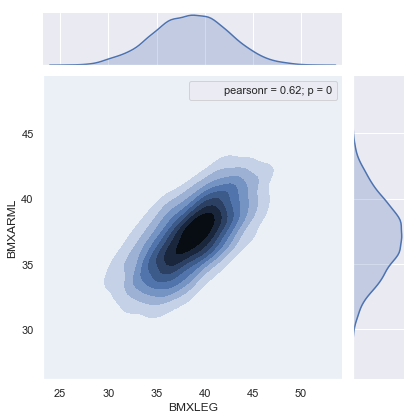

In [117]:
sns.jointplot(y = dataset.BMXARML , x = dataset.BMXLEG , kind = 'kde').annotate(stats.pearsonr)
plt.show()

# Another example

in another example we can plot diastolic pressure and systolic pressure . In the beow plot we can obseve that diastolic and systolic pressure are weakly correlated than arm length and leg length as pearson coefficient is 0.32 . That means person having high systolic pressure generally having average distolic pressure

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


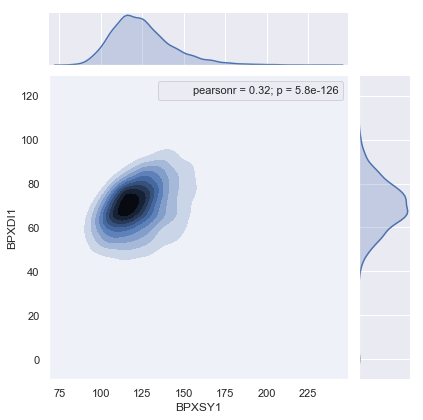

In [124]:
sns.jointplot(y = dataset.BPXDI1 , x = dataset.BPXSY1 , kind = 'kde').annotate(stats.pearsonr)
plt.show()

## Another example

Let's look another example where blood pressure is measure after some minutes on same person . We can observe that it is having a very high correlation of 0.96 , with a positive slope .

c:\users\kiit\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


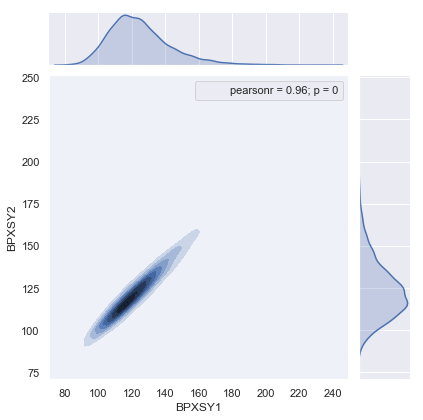

In [128]:
sns.jointplot(x = dataset.BPXSY1 , y = dataset.BPXSY2 , kind = 'kde').annotate(stats.pearsonr)
plt.show()

# Heterogenity and Stratification

Most human characteristics are complex , relationship between leg length , and arm length group by gender

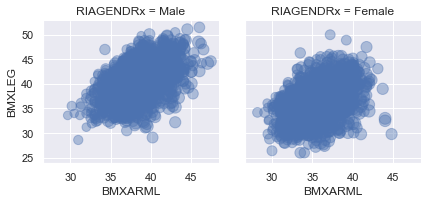

In [144]:
dataset['RIAGENDRx'] = dataset.RIAGENDR.replace({1:"Male" , 2:"Female"})

sns.FacetGrid(dataset , col = "RIAGENDRx").map(plt.scatter, "BMXARML" , "BMXLEG" , "BMXWAIST",alpha = 0.4 ).add_legend()



In [152]:
print("Male",dataset.loc[dataset.RIAGENDR == 1,["BMXARML" , "BMXLEG"]].dropna().corr())
print()
print("Female",dataset.loc[dataset.RIAGENDR == 2,["BMXARML" , "BMXLEG"]].dropna().corr())

Male           BMXARML    BMXLEG
BMXARML  1.000000  0.505426
BMXLEG   0.505426  1.000000

Female           BMXARML    BMXLEG
BMXARML  1.000000  0.434703
BMXLEG   0.434703  1.000000


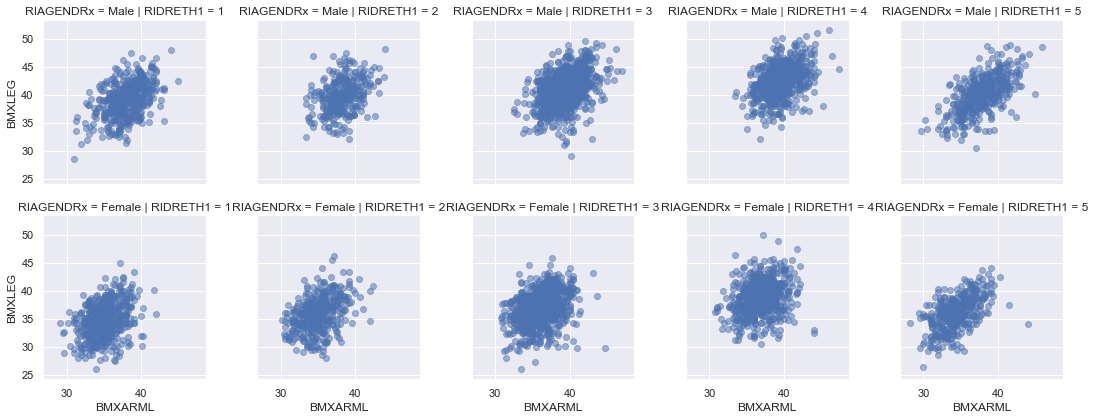

In [156]:
sns.FacetGrid(dataset , row = "RIAGENDRx" , col = "RIDRETH1").map(plt.scatter , "BMXARML", "BMXLEG",alpha = 0.5 ).add_legend()
plt.show()

# Categorical Bivartite Data

In [162]:
dataset["DMDEDUC2x"] = dataset.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
dataset["DMDMARTLx"] = dataset.DMDMARTL.replace({1: "Married", 2: "Widowed", 3: "Divorced", 4: "Separated", 5: "Never married",
                                      6: "Living w/partner", 77: "Refused"})

db = dataset.loc[(dataset.DMDEDUC2x != "Don't Know") & (dataset.DMDMARTLx != "Refused") , :]
db.head(3)

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,RIAGENDRx,DMDEDUC2x,DMDMARTLx
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Male,College,Married
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Male,HS/GED,Divorced
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Male,HS/GED,Married


Now we can create a contingency table , counting the number of people in each cell defined by a combination of marrital status and education

In [177]:
x = pd.crosstab(db.DMDEDUC2x , db.DMDMARTLx)
# Returns dataframe
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,62,80,305,117,39,40
<9,52,66,341,65,43,88
College,120,85,827,253,22,59
Don't know,1,0,0,0,0,2
HS/GED,127,133,550,237,40,99
Some college/AA,217,163,757,332,42,108


Result will be easier to interpret if we normalize the data

In [173]:
x = x.apply(lambda x: x/x.sum() , axis = 1)
x
# This gives us results with person ratio belonging to its education

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.096423,0.124417,0.474339,0.181960,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.099237,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.185212,0.016105,0.043192
Don't know,0.333333,0.000000,0.000000,0.000000,0.000000,0.666667
HS/GED,0.107083,0.112142,0.463744,0.199831,0.033727,0.083474
Some college/AA,0.134033,0.100679,0.467573,0.205065,0.025942,0.066708


In [178]:
# We can also find out in terms of relationship , int erms of columns

x = x.apply(lambda x: x/x.sum() , axis = 0)
x

DMDMARTLx,Divorced,Living w/partner,Married,Never married,Separated,Widowed
DMDEDUC2x,,,,,,
9-11,0.107081,0.151803,0.109712,0.116534,0.209677,0.101010
<9,0.089810,0.125237,0.122662,0.064741,0.231183,0.222222
College,0.207254,0.161290,0.297482,0.251992,0.118280,0.148990
Don't know,0.001727,0.000000,0.000000,0.000000,0.000000,0.005051
HS/GED,0.219344,0.252372,0.197842,0.236056,0.215054,0.250000
Some college/AA,0.374784,0.309298,0.272302,0.330677,0.225806,0.272727


In [181]:
# We can als0 find these trends for men and women
# The following line does these steps, reading the code from left to right:
# 1 Group the data by every combination of gender, education, and marital status
# 2 Count the number of people in each cell using the 'size' method
# 3 Pivot the marital status results into the columns (using unstack)
# 4 Fill any empty cells with 0
# 5 Normalize the data by row
db.groupby(['RIAGENDRx', 'DMDEDUC2x',"DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x:x/x.sum() , axis = 1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          Don't know       0.000000          0.000000  0.000000   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          Don't know       0.500000          0.000000  0.000000   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          Don't know            0.000000   0.000000  1.000000  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          Don't know            0.000000   0.000000  0.500000  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

In [186]:
dx = db.groupby(["RIAGENDRx","DMDEDUC2x","DMDMARTLx"]).size()
dx

RIAGENDRx  DMDEDUC2x        DMDMARTLx       
Female     9-11             Divorced             33
                            Living w/partner     36
                            Married             120
                            Never married        50
                            Separated            22
                            Widowed              30
           <9               Divorced             32
                            Living w/partner     32
                            Married             148
                            Never married        38
                            Separated            31
                            Widowed              68
           College          Divorced             79
                            Living w/partner     40
                            Married             414
                            Never married       131
                            Separated            12
                            Widowed              41
           Don't kn

In [189]:
dx.unstack().fillna(0).apply(lambda x:x/x.sum() , axis = 1)

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.113402          0.123711  0.412371   
          <9               0.091691          0.091691  0.424069   
          College          0.110181          0.055788  0.577406   
          Don't know       0.000000          0.000000  0.000000   
          HS/GED           0.121784          0.109777  0.413379   
          Some college/AA  0.148678          0.099119  0.418502   
Male      9-11             0.082386          0.125000  0.525568   
          <9               0.065359          0.111111  0.630719   
          College          0.063174          0.069337  0.636364   
          Don't know       0.500000          0.000000  0.000000   
          HS/GED           0.092869          0.114428  0.512438   
          Some college/AA  0.115331          0.102672  0.530239   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.171821   0.075601  0.103093  
          <9                    0.108883   0.088825  0.194842  
          College               0.182706   0.016736  0.057183  
          Don't know            0.000000   0.000000  1.000000  
          HS/GED                0.188679   0.041166  0.125214  
          Some college/AA       0.210352   0.031938  0.091410  
Male      9-11                  0.190341   0.048295  0.028409  
          <9                    0.088235   0.039216  0.065359  
          College               0.187982   0.015408  0.027735  
          Don't know            0.000000   0.000000  0.500000  
          HS/GED                0.210614   0.026534  0.043118  
          Some college/AA       0.198312   0.018284  0.035162

In [210]:
# Look at the above results 

dx = db.loc[(db.RIDAGEYR >= 40) & (db.RIDAGEYR<50 ),:]
a = dx.groupby(["RIAGENDRx","DMDEDUC2x","DMDMARTLx"]).size().unstack().fillna(0).apply(lambda x:x/x.sum() , axis=1)
a

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.090909          0.072727  0.581818   
          <9               0.089286          0.142857  0.464286   
          College          0.121019          0.019108  0.713376   
          HS/GED           0.151163          0.127907  0.476744   
          Some college/AA  0.184713          0.082803  0.509554   
Male      9-11             0.092593          0.129630  0.574074   
          <9               0.023810          0.142857  0.714286   
          College          0.051724          0.034483  0.879310   
          HS/GED           0.093023          0.081395  0.616279   
          Some college/AA  0.125000          0.125000  0.625000   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.163636   0.090909  0.000000  
          <9                    0.142857   0.125000  0.035714  
          College               0.108280   0.012739  0.025478  
          HS/GED                0.116279   0.104651  0.023256  
          Some college/AA       0.152866   0.057325  0.012739  
Male      9-11                  0.166667   0.037037  0.000000  
          <9                    0.095238   0.000000  0.023810  
          College               0.034483   0.000000  0.000000  
          HS/GED                0.162791   0.046512  0.000000  
          Some college/AA       0.096154   0.019231  0.009615

In [211]:
dx = db.loc[(db.RIDAGEYR >= 50) & (db.RIDAGEYR < 60),:]
b = dx.groupby(["RIAGENDRx","DMDEDUC2x","DMDMARTLx"]).size().fillna(0).unstack().apply(lambda x:x/x.sum() , axis = 1)
b

DMDMARTLx                  Divorced  Living w/partner   Married  \
RIAGENDRx DMDEDUC2x                                               
Female    9-11             0.075472          0.169811  0.490566   
          <9               0.200000          0.066667  0.511111   
          College          0.180180          0.018018  0.648649   
          HS/GED           0.155340          0.067961  0.563107   
          Some college/AA  0.230216          0.050360  0.496403   
Male      9-11             0.151515          0.075758  0.666667   
          <9               0.056604          0.094340  0.622642   
          College          0.080808          0.050505  0.737374   
          HS/GED           0.156863          0.078431  0.637255   
          Some college/AA  0.188034          0.059829  0.555556   

DMDMARTLx                  Never married  Separated   Widowed  
RIAGENDRx DMDEDUC2x                                            
Female    9-11                  0.132075   0.075472  0.056604  
          <9                    0.044444   0.111111  0.066667  
          College               0.081081   0.045045  0.027027  
          HS/GED                0.058252   0.048544  0.106796  
          Some college/AA       0.107914   0.064748  0.050360  
Male      9-11                  0.075758   0.015152  0.015152  
          <9                    0.132075   0.056604  0.037736  
          College               0.121212   0.010101       NaN  
          HS/GED                0.088235   0.029412  0.009804  
          Some college/AA       0.136752   0.034188  0.025641

In [212]:
print(a.loc[:,["Married"]].unstack()) 

DMDMARTLx   Married                                              
DMDEDUC2x      9-11        <9   College    HS/GED Some college/AA
RIAGENDRx                                                        
Female     0.581818  0.464286  0.713376  0.476744        0.509554
Male       0.574074  0.714286  0.879310  0.616279        0.625000


In [213]:
print(b.loc[:,"Married"].unstack())

DMDEDUC2x      9-11        <9   College    HS/GED  Some college/AA
RIAGENDRx                                                         
Female     0.490566  0.511111  0.648649  0.563107         0.496403
Male       0.666667  0.622642  0.737374  0.637255         0.555556


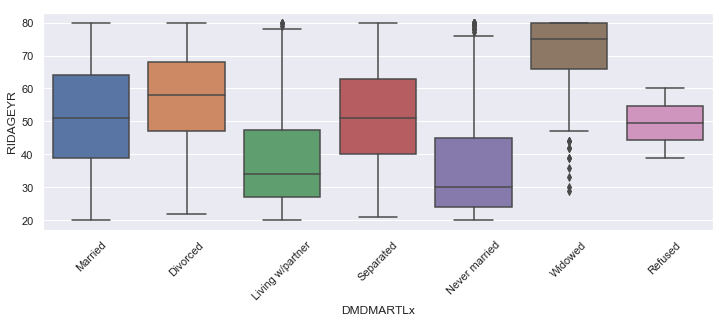

In [221]:
# To plot boxplot for studies and age group , marrital status and age group
plt.figure(figsize = (12,4))
sns.boxplot(y = dataset.RIDAGEYR , x = dataset.DMDMARTLx ) 
plt.xticks(rotation = 45)
plt.show()

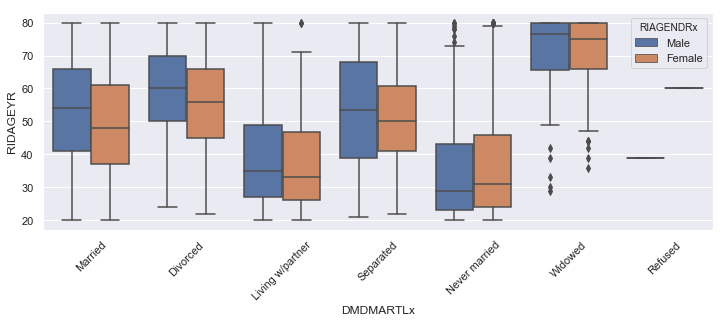

In [220]:
plt.figure(figsize = (12,4))
sns.boxplot(y = dataset.RIDAGEYR , x = dataset.DMDMARTLx , hue = dataset.RIAGENDRx) 
plt.xticks(rotation = 45)
plt.show()

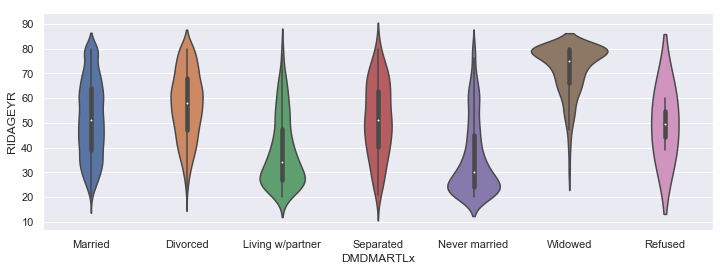

In [223]:
# When we have enough data we can show distribution using violin plot , this also gave insights about mean which is missing in boxplot
plt.figure(figsize = (12,4))
sns.violinplot(x = dataset.DMDMARTLx , y = dataset.RIDAGEYR)
plt.show()